price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


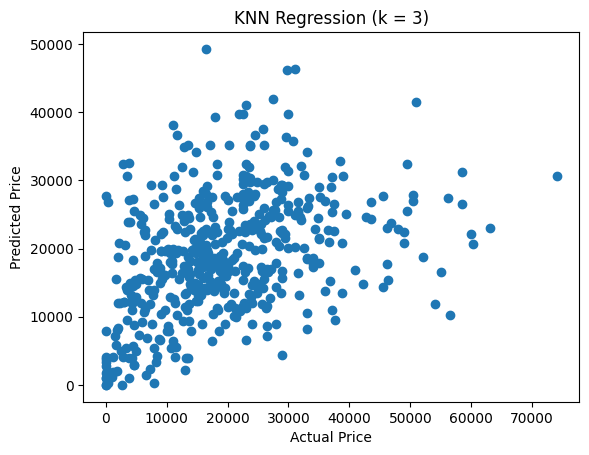

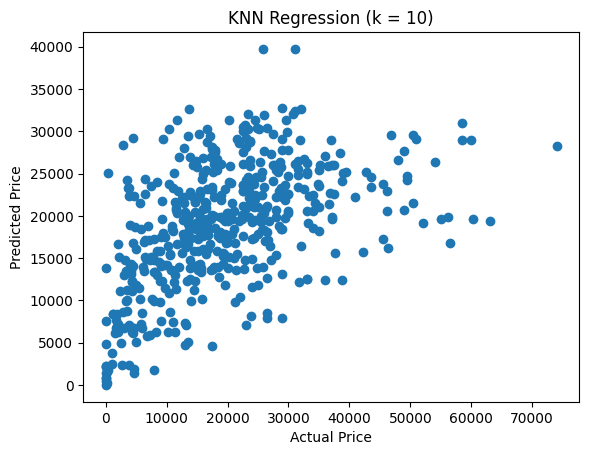

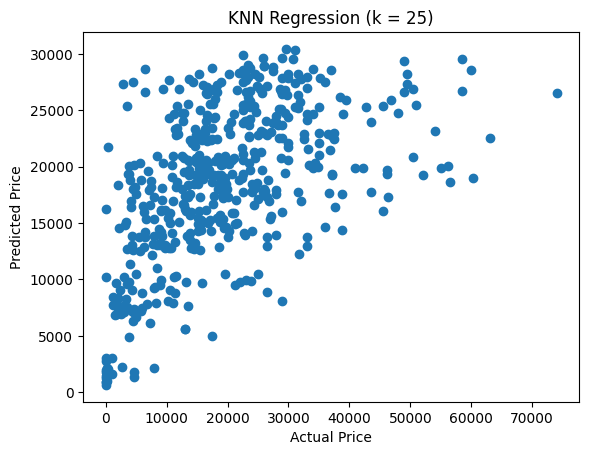

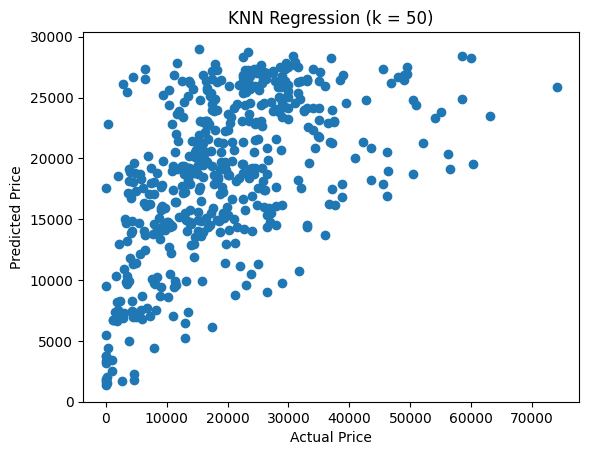

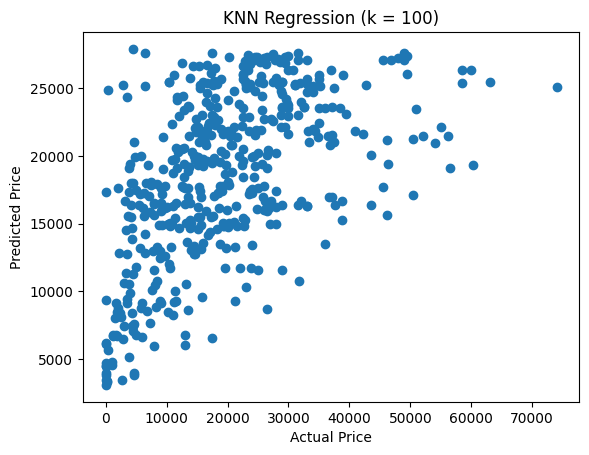

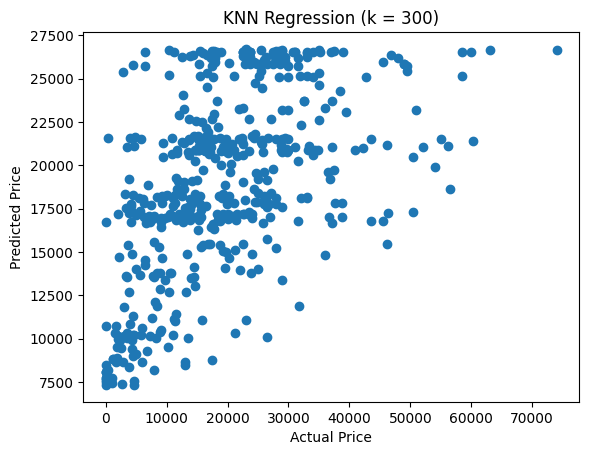

k = 3, MSE = 148104157.1862222
k = 10, MSE = 117399126.10604002
k = 25, MSE = 112600455.15990078
k = 50, MSE = 110202549.3014296
k = 100, MSE = 112251075.33766721
k = 300, MSE = 114497987.75799589
Optimal k: 50
Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')
int64
[1 4 2 7 6 5 3]

Class 1:
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']

Class 2:
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparro

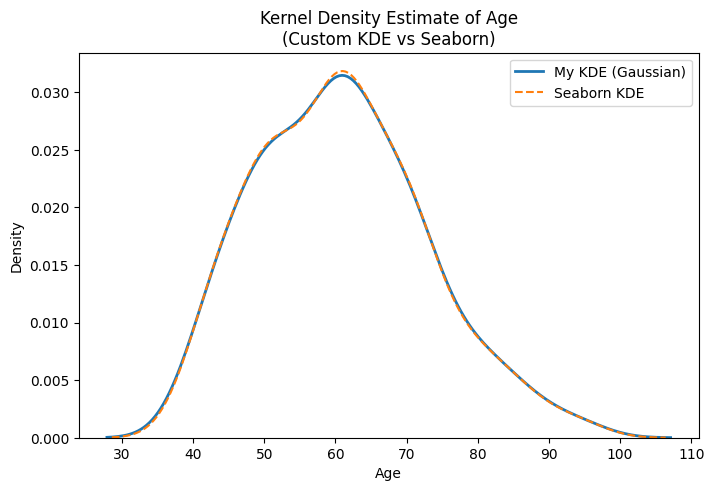

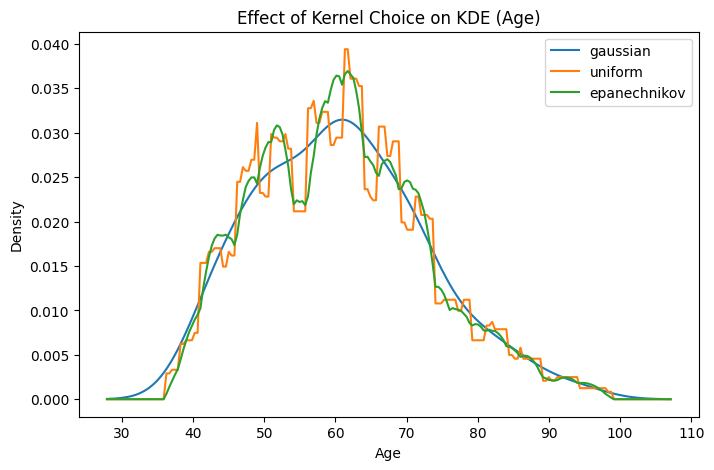

In [ ]:
#Used Chat GPT as a Guide and also worked with Ananya Kumar
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


#load data
df = pd.read_csv("/Users/jaithajasti/Downloads/USA_cars_datasets.csv")

# Keep only relevant columns
df = df[['price', 'year', 'mileage']]
print(df.isna().sum())   # NA check
print(df.head())        # head
print(df.shape)         # dimensions

#there are no NAs
#max-min normalize
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

#train-test split
X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#KKN regression
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    
    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"KNN Regression (k = {k})")
    plt.show()

#ANSWER 2.4:
#as k increases, the points become more scattered (especially towards the top) and the points cluster less at the bottom left and more throughout the graph instead. 


#MSE and finding optimal k:
for k, mse in mse_results.items():
    print(f"k = {k}, MSE = {mse}")

#k = 3, MSE = 148104157.1862222
#k = 10, MSE = 117399126.10604002
#k = 25, MSE = 112600455.15990078
#k = 50, MSE = 110202549.3014296
#k = 100, MSE = 112251075.33766721
#k = 300, MSE = 114497987.75799589

optimal_k = min(mse_results, key=mse_results.get)
print("Optimal k:", optimal_k)

#ANSWER 2.5: Optimal k = 50

#ANSWER 2.6: 
# smaller k values caused overfitting which made the predictions very condensed in one area (failed to learn the general pattern)
# as k increased, predictions started to follow a trend and the MSE dereased until k = 50
# larger k values (k = 100, 300) caused underfitting and the prediction became more scattered/failed
# therefore, the optimal k is the one that minimized MSE (k = 50) and balanced overfitting with underfitting

#QUESTION 3:

#load data
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#read
df = pd.read_csv("zoo.csv")
print(df.columns)
print(df['class'].dtype)
print(df['class'].unique())

# Print animals in each class
for c in sorted(df['class'].unique()):
    print(f"\nClass {c}:")
    print(df.loc[df['class'] == c, 'animal'].values)

#eda
print(df['class'].value_counts())

#variation in features
features = df.drop(columns=['animal', 'class'])
print(features.describe())

#check
# Mean of each feature by class
print(df.groupby('class').mean(numeric_only=True))

#ANSWER 3.1
#the class sizes are pretty imbalanced with class 1 having the most data. Some features may overlap while others are going to be strong identifiers for specific classes
#milk is the best predictor for Class 1 because it is unique to mammals and all mammals produce milk (females)
#feathers are the best predictor for Class 2 because it is unique to birds and all birds have feathers
#reptiles are harder to isolate but perhaps eggs could be the best predictor (Class 3)
#fins are the best predictor for fish (Class 4)
#amphibians is also harder to isolate but perhaps aquatic and eggs (Class 5)
#legs are the best predictor for insects (Class 6)
#backbone = 0 and unusual leg counts could be strong predictors for other invertebrates (Class 7)
#train-test split (50/50)
X = df.drop(columns=['animal', 'class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)


#build k-NN classifier
k_values = range(1, 16)
acc = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc[k] = accuracy_score(y_test, y_pred)

print(acc)

optimal_k = max(acc, key=acc.get)
print("Optimal k:", optimal_k)

#Optimal k = 1
#ANSWER 3.3: since the zoo data is seaprable due to there being pretty major identifiers which means that the closest neighbor is going to be correct, usually. Also, the dataset is small which means that if we were to increase k, then we could be making it more biased since larger ks would start crossing different biological groups
#also, a lot of the data is binary, which means there isn't much noise (either 1s or 0s) so smaller ks work better and overfitting will not be a big concern


#confusion table
knn_opt = KNeighborsClassifier(n_neighbors=optimal_k)
knn_opt.fit(X_train, y_train)
y_pred = knn_opt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#ANSWER 3.4: this is high accuracy (diagonal sum is 49 and total samples is 51; 49/51 = 96%); looking at off-diagonals for accuracy reveals that class 3 has errors due to reptiles and fish (class 4) having shared features like eggs and backbone
#furthermore, invertebrates had overlap with amphibians (class 5), causing class 7 errors

#restricted model
X_small = df[['milk', 'aquatic', 'airborne']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.5, random_state=42, stratify=y
)

knn_small = KNeighborsClassifier(n_neighbors=optimal_k)
knn_small.fit(X_train, y_train)

y_pred_small = knn_small.predict(X_test)

print("Confusion Matrix (restricted features):")
print(confusion_matrix(y_test, y_pred_small))

#underlying probabilities
# Fix: use X_test as a DataFrame
probs = knn_small.predict_proba(X_test)

print("Predicted probabilities (first 5 rows):")
print(probs[:5])

import numpy as np

predicted_classes = np.unique(knn_small.predict(X_test))
print("Classes actually represented:", predicted_classes)

#ANSWER 3.5: No, not all the classes were represented. Since only milk, aquatic, and airborne were used as predictors, the KKN model can only predict classes 1,2,3,4. Classes 5,6,7 were not able to be predicted because the features for these smaller classes always overlapped with a larger class, which meant that the nearest neighbor always went to the larger or more separate classes.

#Question 4:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

def uniform_kernel(z):
    return np.where(np.abs(z) <= 1, 0.5, 0)

def epanechnikov_kernel(z):
    return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0)
def silverman_bandwidth(x):
    n = len(x)
    return 1.06 * np.std(x, ddof=1) * n ** (-1/5)

def my_kde(
    data,
    kernel="gaussian",
    bandwidth=None,
    grid_points=200
):
    """
    Custom kernel density estimator.
    
    Choices made:
    - Use Silverman's rule for default bandwidth
    - Use cdist for efficient distance calculation
    - Evaluate density on an evenly spaced grid
    """

    # Convert input to NumPy array
    x = np.asarray(data).reshape(-1, 1)
    n = len(x)

    # Bandwidth choice
    if bandwidth is None:
        h = silverman_bandwidth(x.flatten())
    else:
        h = bandwidth

    # Evaluation grid
    x_grid = np.linspace(x.min() - 3*h, x.max() + 3*h, grid_points).reshape(-1, 1)

    # Distance calculation (vectorized, fast)
    z = cdist(x_grid, x) / h

    # Kernel selection
    if kernel == "gaussian":
        K = gaussian_kernel(z)
    elif kernel == "uniform":
        K = uniform_kernel(z)
    elif kernel == "epanechnikov":
        K = epanechnikov_kernel(z)
    else:
        raise ValueError("Kernel must be 'gaussian', 'uniform', or 'epanechnikov'")

    # KDE formula
    density = K.sum(axis=1) / (n * h)

    return x_grid.flatten(), density

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.columns)
data = df['age'].dropna() # Using age because it is continuous and interpretable

# Custom KDE
x_grid, density = my_kde(data, kernel="gaussian")

plt.figure(figsize=(8,5))
plt.plot(x_grid, density, label="My KDE (Gaussian)", linewidth=2)

# Seaborn KDE
sns.kdeplot(data, label="Seaborn KDE", linestyle="--")

plt.legend()
plt.title("Kernel Density Estimate of Age\n(Custom KDE vs Seaborn)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(8,5))

for k in ["gaussian", "uniform", "epanechnikov"]:
    xg, d = my_kde(data, kernel=k)
    plt.plot(xg, d, label=k)

plt.legend()
plt.title("Effect of Kernel Choice on KDE (Age)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()